# OASIS AS_REQ DAM _and_ FUEL_PRC

OASIS AS_REQ Day Ahead Market Report(s)
and
OASIS FUEL_PRC Report(s)

## Load the data

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
from pandasql import sqldf
# Create the connections
cnx1 = sqlite3.connect(r'./data-oasis-as-req-dam_00.db')
cnx2 = sqlite3.connect(r'./data-oasis-prc-fuel-all_00.db')

## Preview the schema of data-oasis-as-req-dam

In [17]:
for table in ['disclaimer_item','messagepayload','report_data','report_item','messageheader','oasisreport','report_header','rto']:      
    print("--------------------------------------------------")
    print("table: %s" % table)
    print("--------------------------------------------------")
    for info in cnx1.execute("PRAGMA table_info([%s]);" % table):
         print(info)

--------------------------------------------------
table: disclaimer_item
--------------------------------------------------
(0, 'id', 'TEXT', 0, None, 1)
(1, 'disclaimer', 'TEXT', 0, None, 0)
(2, 'rto_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: messagepayload
--------------------------------------------------
(0, 'id', 'TEXT', 0, None, 1)
(1, 'oasisreport_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: report_data
--------------------------------------------------
(0, 'id', 'TEXT', 0, None, 1)
(1, 'interval_end_gmt', 'TEXT', 0, None, 0)
(2, 'interval_start_gmt', 'TEXT', 0, None, 0)
(3, 'opr_date', 'TEXT', 0, None, 0)
(4, 'value', 'REAL', 0, None, 0)
(5, 'resource_name', 'TEXT', 0, None, 0)
(6, 'interval_num', 'INTEGER', 0, None, 0)
(7, 'data_item', 'TEXT', 0, None, 0)
(8, 'report_item_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: report_item
----------------------------------

In [18]:
## Preview the schema of data-oasis-prc-fuel-all

In [19]:
for table in ['disclaimer_item','messagepayload','report_data','report_item','messageheader','oasisreport','report_header','rto']:      
    print("--------------------------------------------------")
    print("table: %s" % table)
    print("--------------------------------------------------")
    for info in cnx2.execute("PRAGMA table_info([%s]);" % table):
         print(info)

--------------------------------------------------
table: disclaimer_item
--------------------------------------------------
(0, 'disclaimer', 'TEXT', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 1)
(2, 'rto_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: messagepayload
--------------------------------------------------
(0, 'id', 'TEXT', 0, None, 1)
(1, 'oasisreport_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: report_data
--------------------------------------------------
(0, 'resource_name', 'TEXT', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 1)
(2, 'value', 'REAL', 0, None, 0)
(3, 'interval_start_gmt', 'TEXT', 0, None, 0)
(4, 'interval_end_gmt', 'TEXT', 0, None, 0)
(5, 'data_item', 'TEXT', 0, None, 0)
(6, 'opr_date', 'TEXT', 0, None, 0)
(7, 'interval_num', 'INTEGER', 0, None, 0)
(8, 'report_item_id', 'TEXT', 0, None, 0)
--------------------------------------------------
table: report_item
----------------------------------

## Preview the available reports

In [20]:
for row in cnx1.execute("select distinct report from report_header"):
    print(row)

('AS_REQ',)


In [21]:
for row in cnx2.execute("select distinct report from report_header"):
    print(row)

('PRC_FUEL',)


## Preview the data_item(s) 

In [22]:
for row in cnx1.execute("select distinct data_item from report_data;"):
    print(row)

('NS_REQ_MAX_MW',)
('NS_REQ_MIN_MW',)
('RD_REQ_MAX_MW',)
('RD_REQ_MIN_MW',)
('RU_REQ_MAX_MW',)
('RU_REQ_MIN_MW',)
('SP_REQ_MAX_MW',)
('SP_REQ_MIN_MW',)
('RMD_REQ_MAX_MW',)
('RMD_REQ_MIN_MW',)
('RMU_REQ_MAX_MW',)
('RMU_REQ_MIN_MW',)


In [23]:
for row in cnx2.execute("select distinct data_item from report_data;"):
    print(row)

('FUEL_PRC',)


## Load a dataframes

In [27]:
df1 = pd.read_sql("select rh.report, rd.data_item, rd.value, rh.uom, rd.interval_start_gmt from report_header rh JOIN report_data rd on rh.report_item_id = rd.report_item_id;", cnx1)
df1['ts'] = pd.to_datetime(df1['interval_start_gmt'])
df1 = df1.set_index('ts')
df1.drop(['interval_start_gmt'], axis=1, inplace=True)
df1[0:5]

,report,data_item,value,uom
ts,,,,
2016-03-08 07:00:00+00:00,AS_REQ,NS_REQ_MAX_MW,0.00,MW
2016-03-08 07:00:00+00:00,AS_REQ,NS_REQ_MIN_MW,407.59,MW
2016-03-08 07:00:00+00:00,AS_REQ,RD_REQ_MAX_MW,500.00,MW
2016-03-08 07:00:00+00:00,AS_REQ,RD_REQ_MIN_MW,10.00,MW
2016-03-08 07:00:00+00:00,AS_REQ,RU_REQ_MAX_MW,0.00,MW


In [36]:
df2= pd.read_sql("select rd.resource_name, rh.report, rd.data_item, rd.value, rh.uom, rd.interval_start_gmt from report_header rh JOIN report_data rd on rh.report_item_id = rd.report_item_id;", cnx1)
df2['ts'] = pd.to_datetime(df2['interval_start_gmt'])
df2 = df2.set_index('ts')
df2.drop(['interval_start_gmt'], axis=1, inplace=True)
df2[0:5]

,resource_name,report,data_item,value,uom
ts,,,,,
2016-03-08 07:00:00+00:00,AS_CAISO,AS_REQ,NS_REQ_MAX_MW,0.00,MW
2016-03-08 07:00:00+00:00,AS_CAISO,AS_REQ,NS_REQ_MIN_MW,407.59,MW
2016-03-08 07:00:00+00:00,AS_CAISO,AS_REQ,RD_REQ_MAX_MW,500.00,MW
2016-03-08 07:00:00+00:00,AS_CAISO,AS_REQ,RD_REQ_MIN_MW,10.00,MW
2016-03-08 07:00:00+00:00,AS_CAISO,AS_REQ,RU_REQ_MAX_MW,0.00,MW


## Avg Daily Fuel Prices

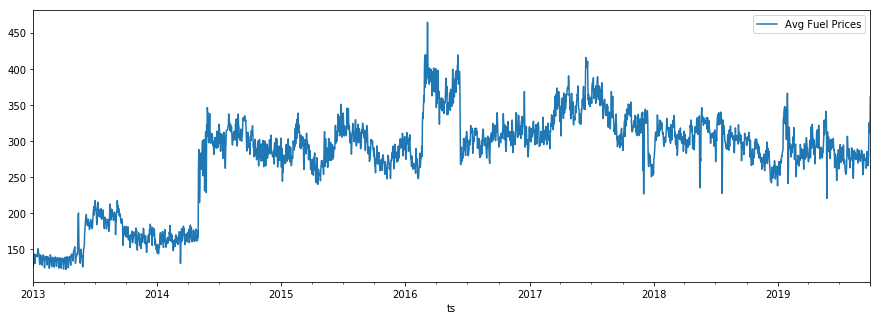

In [37]:
df2daily = df2.resample('D').mean()
df2daily.plot(y='value', label='Avg Fuel Prices')

## Avg Daily Fuel Prices by Name

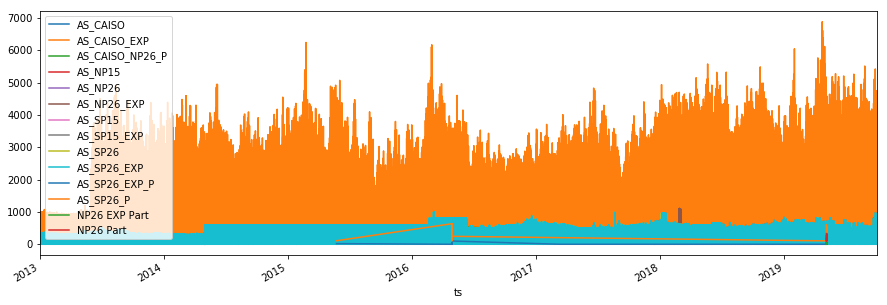

In [38]:
fig, ax = plt.subplots()
for name, grp in df2.groupby(['resource_name']):
    ax = grp.plot(ax=ax, y='value', label=name)

## Fuel Prices compared with AS_REQ DAM

/home/toddg/bin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


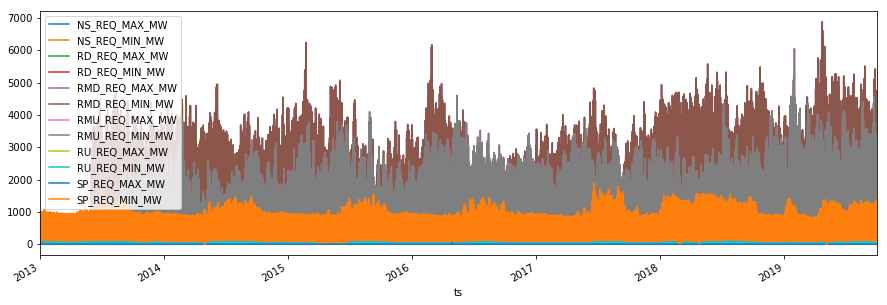

In [39]:
df3 = df1.append(df2)
fig, ax = plt.subplots()
for name, grp in df3.groupby(['data_item']):
    if name == "FUEL_PRC":
        ax = grp.plot(ax=ax, y='value', label=name, secondary_y=True)
    else:
        ax = grp.plot(ax=ax, y='value', label=name)

## Summary

_This notebook shows how to:_

* load mutiple datasets into dataframes
* append two different dataframes
* convert timestamps to dataframe time series
* display a single graph composed of data from multiple sources